# Data Science Technical Test <a class='tocSkip'>
-----
## Ana Isabel Rúa G.
## Msc.(c)Technology Information - Emphasis on Data Dcience <a class='tocSkip'>
#### https://github.com/anarua1203 

**Description:** With about 14  explanatory variables that describe (almost) all aspects of the corporate  purchase card transactions behavior for the Birmingham City Council, the idea for this paper is to use machine learning to explore and gain deeper knowledge from this data set.

** Where does this data comes from?:** Under the Code of Recommended Practice for Local Authorities on Data Transparency, councils are encouraged to publish all corporate purchase card transactions. 

Birmingham City Council has already publish details of all their relevant expenditure of more than £500 within Payments to Suppliers page, and will continue to do so. However, in the spirit of the Code, the Council started publishing all purchase card transactions, regardless of value, from the April 2014 card statement. 

Data: https://data.birmingham.gov.uk/dataset/purchase-card-transactions


**Problem tasks:** 
* (Clustering) Discovering profiles (whether the case) or unusual transactions (anomalies detection)
* (Forecasting) Try to guess future transactional behaviors. 

# Import Libraries

In [51]:
# Basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os

# Pre-processing
from sklearn.preprocessing import StandardScaler

# Dimensionality Reduction 
from sklearn.decomposition import PCA

# Selection of training and validation sets 
from sklearn.model_selection import train_test_split, GridSearchCV

# Linear regression 
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso

# classification 
from sklearn.neighbors import KNeighborsClassifier

# Error 
from sklearn.metrics import mean_squared_error 

# Eprocessing stages
from sklearn.pipeline import Pipeline

# Pretty print
from pprint import pprint

# Save/Load model
import joblib

# Load Data

In [11]:
df = pd.read_csv("../data/interim/serie_directorate.csv",sep='|',index_col='directorate')

In [12]:
df.head()

,2014-03-10 00:00:00,2014-03-17 00:00:00,2014-03-24 00:00:00,2014-03-31 00:00:00,2014-04-07 00:00:00,2014-04-14 00:00:00,2014-04-21 00:00:00,2014-04-28 00:00:00,2014-05-05 00:00:00,2014-05-12 00:00:00,...,2017-12-04 00:00:00,2017-12-11 00:00:00,2017-12-18 00:00:00,2017-12-25 00:00:00,2018-01-01 00:00:00,2018-01-08 00:00:00,2018-01-15 00:00:00,2018-01-22 00:00:00,2018-01-29 00:00:00,2018-02-05 00:00:00
directorate,,,,,,,,,,,,,,,,,,,,,
adults & communities,0.0,0.0,0.0,0.0,0.060534,0.020698,0.513527,0.036242,0.013982,0.0,...,0.052524,0.0,0.0,0.0,0.0,0.007269,0.008214,0.067300,0.006227,0.162112
corporate resources,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,...,0.063794,0.0,0.0,0.0,0.0,0.039183,0.031368,0.052393,0.028008,0.399333
cyp&f schools,0.0,0.0,0.0,0.0,0.469064,0.627078,0.752515,0.413453,0.270655,0.0,...,0.223857,1.0,0.0,1.0,0.0,0.081255,0.212737,0.233351,0.145932,0.217485
development,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
local services,0.0,0.0,0.0,0.0,0.112280,0.187932,0.308963,0.165593,0.097811,0.0,...,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
df_ac= pd.DataFrame(df.iloc[0]).T

In [20]:
df_ac

,2014-03-10 00:00:00,2014-03-17 00:00:00,2014-03-24 00:00:00,2014-03-31 00:00:00,2014-04-07 00:00:00,2014-04-14 00:00:00,2014-04-21 00:00:00,2014-04-28 00:00:00,2014-05-05 00:00:00,2014-05-12 00:00:00,...,2017-12-04 00:00:00,2017-12-11 00:00:00,2017-12-18 00:00:00,2017-12-25 00:00:00,2018-01-01 00:00:00,2018-01-08 00:00:00,2018-01-15 00:00:00,2018-01-22 00:00:00,2018-01-29 00:00:00,2018-02-05 00:00:00
adults & communities,0.0,0.0,0.0,0.0,0.060534,0.020698,0.513527,0.036242,0.013982,0.0,...,0.052524,0.0,0.0,0.0,0.0,0.007269,0.008214,0.0673,0.006227,0.162112


# Function

In [21]:
def Serie_to_matriz(X_input, window):
    """ Input: 
            X_input: time serie (array column)
            window=10
        Output:
            X_output: window matrix ()
            y_output
    """
    X_output = np.zeros([len(X_input)-window,window])
    for i in range(len(X_input)-window):
        X_output[i,:] = X_input[i:i+5].T 
    
    y_output = X_input[window:]
    
    return X_output, y_output

In [23]:
timeSerie = df_ac.stack()
print("Tamaño de la serie de tiempo {}".format(len(timeSerie)))

Tamaño de la serie de tiempo 205


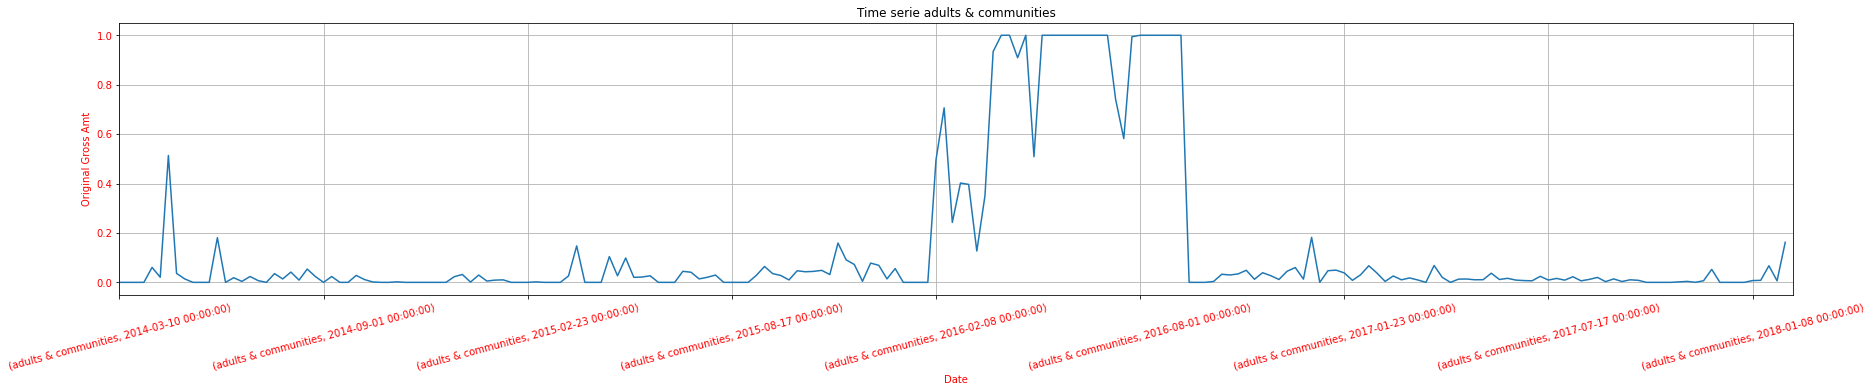

In [24]:

# Ploter el conjunto de datos 
plt.figure(figsize=(30,5))
timeSerie.plot(subplots=True)
plt.xlim(0,len(timeSerie))
plt.xticks(c='r', rotation=15); plt.xlabel('Date', c='r')
plt.yticks(c='r'); plt.ylabel('Original Gross Amt',c='r')
plt.title('Time serie adults & communities')
plt.grid(True)

# Preprocessing

In [33]:
wind = timeSerie
X_input = np.array(wind)
time = np.arange(0, len(X_input),1)

In [34]:
len(X_input)

205

In [36]:
X__, y__ = Serie_to_matriz(X_input, window=5) 

X_, X_test, y_, y_test = train_test_split(X__, y__, test_size=0.20, random_state=42)

X_.shape, y_.shape, X_test.shape, y_test.shape

((160, 5), (160,), (40, 5), (40,))

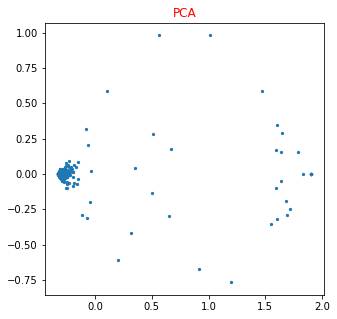

In [37]:
# Analisis exploratorio de los datos
pca = PCA(n_components = 2)
tranformed_pca = pca.fit_transform(X__)

plt.figure(figsize=(5, 5))
plt.title("PCA", c='r')
plt.scatter(tranformed_pca[:,0], tranformed_pca[:,1], s=5)
plt.show()

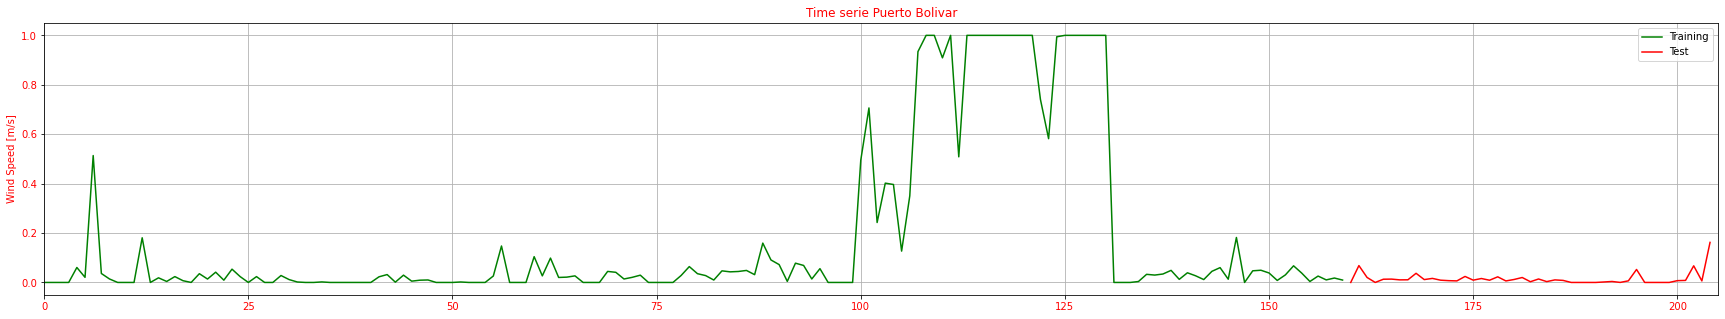

In [38]:
# Ploter el conjunto de datos 
plt.figure(figsize=(30,5))
plt.plot(time[0:X_.shape[0]], X_input[0:X_.shape[0]], 'g', label= 'Training')
plt.plot(time[X_.shape[0]:], X_input[X_.shape[0]:], 'r', label= 'Test')
plt.title('Time serie adults & communities',c='r')
plt.xticks(c='r')
plt.yticks(c='r'); plt.ylabel('Wind Speed [m/s]',c='r')
plt.xlim(0, X_input.shape[0])
plt.legend()
plt.grid(True)
plt.show()

# Machine Learning Models

Kernel Ridge:
$$Cost function = \frac{1}{2} \sum (y_{i} - w^\top x_{i})^{2} + \frac{1}{2}\lambda||w||^{2}$$$$w^* = \left( \lambda I + \sum x_{i}x_{i}^\top\right)^{-1} \left(\sum y_{i}x_{i}\right)$$$$ w = \left(  \alpha I + \Phi \Phi^\top \right)^{-1} \left( \Phi y \right) $$

$$\alpha = \sum \alpha \Phi (x_{i})$$

In [40]:
# Caracteristicos de los modelos a probar 
"""
    1. 'scaler': Estandarizar cada atriuto columna de xtrain centrada en 0 y var = 1
    2. 'reg': Clasificador 
    3. 'scaler': Estandarizar cada atriuto columna de xtrain centrada en 0 y var = 1
    4. 'rep': reducción de dimensiones
    5. 'reg': Pueden utilizar clase generada tsne_map()
"""

models = [
            [('scaler', StandardScaler()), 
             ('reg',  KernelRidge(kernel = 'rbf'))
            ],  
            [('scaler', StandardScaler()), 
             ('rep', PCA()),
             ('reg', KNeighborsRegressor())]
        ]   
            
model_names = ['NorSC-KRRBF','NorSC-PCA-KNN']            

# Parametros de búsqueda por malla
""" 
    Parametros n_neighbors debe ser siempre un int       
""" 

parameters =[{'reg__gamma':[1e-3,1e-2,1e-1,1,10,100],
              'reg__alpha':[1e-3,1e-2,1e-1,1,10,100]
              },
             {'reg__n_neighbors': [1,3,5], 
              'rep__n_components':[0.5,0.75,0.9]}
             ]

In [41]:
# Número de particiones para la cross-validación
iterations = 10     
# Matriz para guardar el mejor modelo de predicción
mse = np.zeros((iterations,len(models)))
# Mejor predictor y sus hiperparametros
best_estimators = iterations*[None]
best_hyperparameters = iterations*[None]

# Recorrer todos los posibles modelos 
# i: Variaciones de los hiper-parámetros              
for i in range(iterations):          
    # Selección de los conjunto de entrenamiento y   validación
    X_train, X_valid, y_train, y_valid = train_test_split(X_, y_, test_size=0.3)
    
    # Guardar mejor predictor y sus hiperparametros
    list_est = [] 
    list_hyperparameters = [] 

    # Recorrer todos las posibles variables (hiper-parámetros)  
    # j: posibles modelos 
    for j in range(len(models)):
        
        # Seleccion de modelo y parámetros
        method = models[j]
        parameter = parameters[j]

        print("Model {Nmodel} of {Smodel}. Iteration {Niteration} of {Siteration}".format(Nmodel=j,Smodel=len(models),Niteration=i,Siteration=iterations))
        
        grid_search = GridSearchCV(Pipeline(method), 
                                   parameter,
                                   cv=5,
                                   verbose=5,
                                   n_jobs=-1,
                                   scoring='neg_mean_absolute_error')
        
        # Generar modelo
        grid_search.fit(X_train, y_train)
        # Estimar salida conjunto de valid
        y_pred = grid_search.best_estimator_.predict(X_valid)
        # Guardar Mean Suqre Error ()            
        mse[i,j] = mean_squared_error(y_valid, y_pred)
        
        list_est.append(grid_search.best_estimator_)
        list_hyperparameters.append(grid_search.best_params_)

    # Guardar mejores modelos y sus hiperparametros
    best_estimators[i] = list_est 
    best_hyperparameters[i] = list_hyperparameters  

results = { 
        'MSE': mse,
        'best_models':best_estimators,
        'best_parameters':best_hyperparameters
        }

Model 0 of 2. Iteration 0 of 10
Fitting 5 folds for each of 36 candidates, totalling 180 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
Model 1 of 2. Iteration 0 of 10
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  38 out of  45 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
Model 0 of 2. Iteration 1 of 10
Fitting 5 folds for each of 36 candidates, totalling 180 fits
[Parallel(n_jobs=-1)]

In [42]:
parameters_matriz = []
best_hyperparameters_final = []
for r in range(len(models)):
  hyperparameters_r = np.zeros((iterations, len(best_hyperparameters[0][r])))
  for i in range(iterations):
    for j in range(len(best_hyperparameters[0][r])):
      hyperparameters_r[i,j] = best_hyperparameters[i][r].get(list(best_hyperparameters[i][r].keys())[j])

  #  Guardar matriz de parámetros 
  parameters_matriz.append(hyperparameters_r)
  
  # Guardar mediana de los hiper-parámetros
  #np.median(hyperparameters_r[:,0]) , np.median(hyperparameters_r[:,1])]
  best_hyperparameters_final.append([np.median(hyperparameters_r[:,0]),np.median(hyperparameters_r[:,1])]) 

#print("Mejores parámetros para cada uno de los modelos:")
print(best_hyperparameters_final)

[[0.01, 0.001], [5.0, 0.9]]


In [43]:
# Entrenamiento de los modelos con los mejores hiperparámetros 
regression = []
for r in range(len(models)):
  print("Model: ", r, " ", best_hyperparameters_final[r])
  model_f = Pipeline(models[r])
  paramsf = parameters[r]
  label_parameters = list(parameters[r].keys())
  for i in range(len(label_parameters)):
    if label_parameters[i] == 'reg__n_neighbors':
      paramsf[label_parameters[i]] = int(best_hyperparameters_final[r][i])
    else:  
      paramsf[label_parameters[i]] = best_hyperparameters_final[r][i]

  model_f.set_params(**paramsf)
  model_f.fit(X_, y_)

  regression.append(model_f.predict(X_test))

Model:  0   [0.01, 0.001]
Model:  1   [5.0, 0.9]


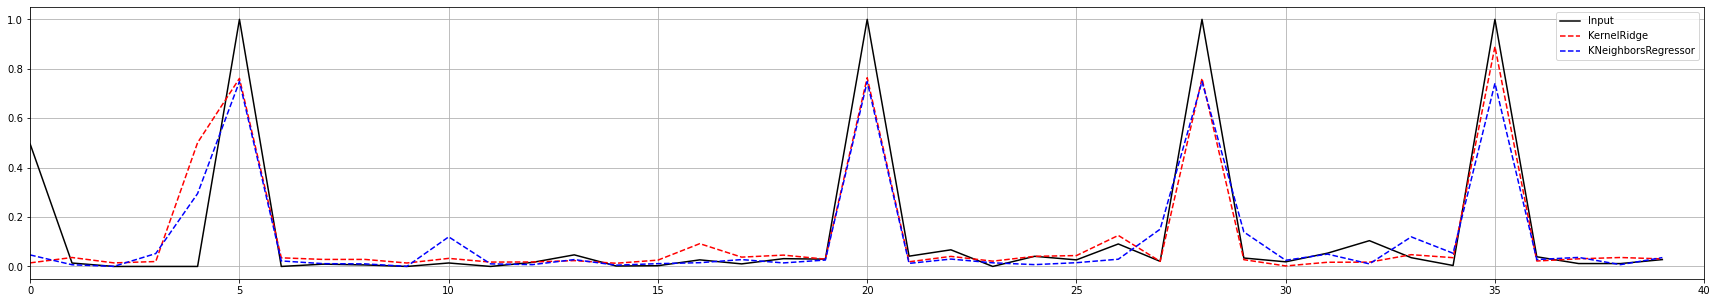

In [44]:
# Resultados (Plotter 1)
plt.figure(figsize=(30,5))
plt.plot(y_test,label='Input', c='k')
plt.plot(regression[0],label='KernelRidge', c='r',  linestyle='--')
plt.plot(regression[1],label='KNeighborsRegressor', c='b',  linestyle='--')
plt.xlim(0,len(y_test))
plt.grid()
plt.legend()
plt.show()

In [52]:
#Save model
filename = '../models/Birmingham_ts_model.sav'
joblib.dump(model_f, filename)

['../models/Birmingham_ts_model.sav']

In [ ]:
`